<a href="https://colab.research.google.com/github/dangtrantrung/Imbalance-Data-/blob/master/Imbalance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Install xgboost, imbalanced-learn
!pip install xgboost
!pip install imbalanced-learn

In [5]:
customer_data = pd.read_csv("/content/sample_data/Churn_Modelling.csv")
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

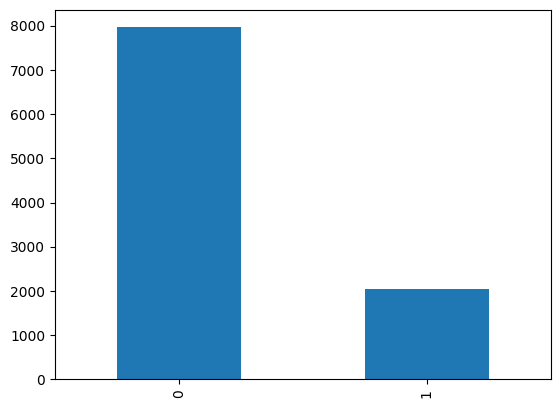

In [6]:
# implalance between 2 class
customer_data['Exited'].value_counts().plot(kind='bar')

In [8]:

dataset=customer_data.drop(['RowNumber','Surname','CustomerId'],axis=1)


In [9]:
# PreProcess Data
# Categorical -> One Hot Columns
dataset_dummy = pd.get_dummies(dataset,drop_first=True)
X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
scaler = MinMaxScaler() # Normalize to 0-1
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

In [10]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.672,0.189189,0.6,0.000000,0.333333,1,1,0.895550,0,0,1
1561,0.564,0.324324,0.4,0.476786,0.333333,1,1,0.980029,1,0,1
1670,0.418,0.081081,0.3,0.457317,0.000000,1,0,0.429261,0,1,1
6087,0.422,0.121622,0.9,0.540606,0.000000,1,0,0.765408,0,0,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0,0,0.197107,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,0.836,0.486486,0.8,0.277853,0.000000,1,1,0.346662,0,0,1
5191,0.664,0.540541,0.1,0.000000,0.000000,1,1,0.003084,0,0,0
5390,0.770,0.270270,0.1,0.000000,0.666667,0,0,0.460925,0,0,0
860,0.634,0.337838,0.8,0.758186,0.000000,1,0,0.487381,0,0,1


In [12]:
# Train model with this Imbalance Data
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [13]:
# Train model with this Imbalance Data, class_weight='balanced'
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [14]:
# Train model with this Imbalance Data and Random Forest - Ensemble
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# model random forest
model_RFC = RandomForestClassifier(n_estimators=200, random_state=42)
model_RFC.fit(X_train, y_train)
y_pred = model_RFC.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.01, random_state=42,n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [16]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [18]:
# Undersampling
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [23]:
dataset_0=dataset[dataset['Exited']==0]
dataset_1=dataset[dataset['Exited']==1]
dataset_0.shape,dataset_1.shape

((7963, 11), (2037, 11))

In [25]:
# random undersampling
dataset_0_rus=dataset_0.sample(dataset_1.shape[0])
dataset_0_rus.shape


(2037, 11)

In [26]:
dataset_random_under=pd.concat([dataset_0_rus,dataset_1])
dataset_random_under.shape

(4074, 11)

In [29]:
dataset_dummy = pd.get_dummies(dataset_random_under,drop_first=True)
X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       443
           1       0.67      0.70      0.69       372

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815



In [31]:
# NearMiss
# Near Miss
dataset_dummy = pd.get_dummies(dataset,drop_first=True)
X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X,y)
X_res.shape, y_res.shape

((4074, 11), (4074,))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       443
           1       0.96      0.80      0.87       372

    accuracy                           0.89       815
   macro avg       0.90      0.88      0.89       815
weighted avg       0.90      0.89      0.89       815



In [34]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
dataset_dummy = pd.get_dummies(dataset,drop_first=True)
X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']
X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape



((15926, 11), (15926,))

In [36]:
dataset_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1633
           1       0.69      0.69      0.69      1553

    accuracy                           0.69      3186
   macro avg       0.69      0.69      0.69      3186
weighted avg       0.69      0.69      0.69      3186

